In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
pip install kneed

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/stock_data.csv")

In [ ]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


**Univariate Analysis**

In [ ]:
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
data.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

In [ ]:
data.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
data[data.duplicated()]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio


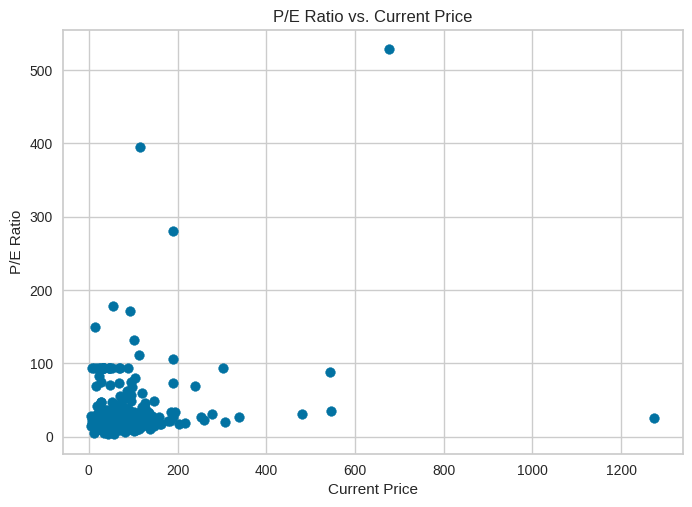

In [ ]:
plt.scatter(data['Current Price'], data['P/E Ratio'])
plt.xlabel('Current Price')
plt.ylabel('P/E Ratio')
plt.title('P/E Ratio vs. Current Price')
plt.show()

<ipython-input-14-cc9d79c9c92e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[('Net Income')]);


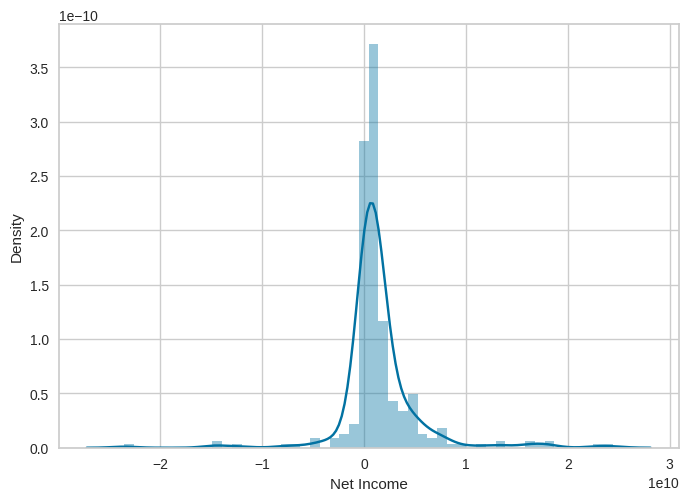

In [ ]:
sns.distplot(data[('Net Income')]);

In [ ]:
data.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<ipython-input-16-82f8aa69be21>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[('Volatility')])


<Axes: xlabel='Volatility', ylabel='Density'>

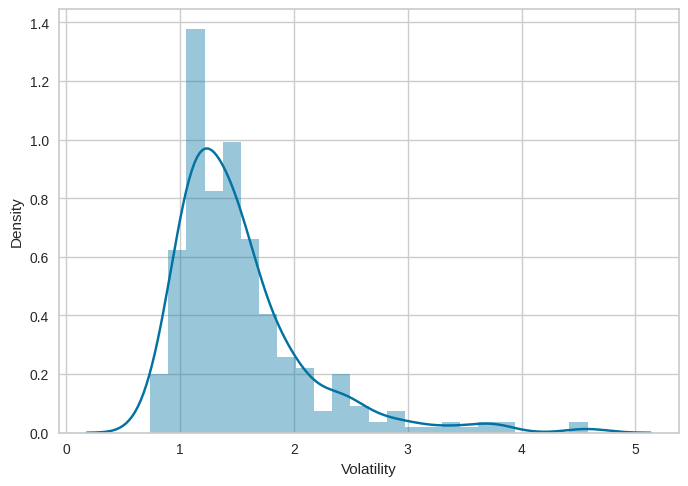

In [ ]:
sns.distplot(data[('Volatility')])

In [ ]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


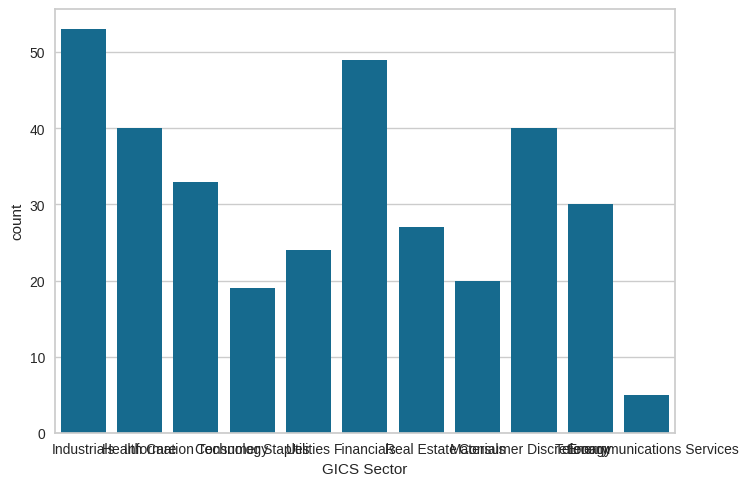

In [ ]:
sns.countplot(data=data,x='GICS Sector')
plt.show()

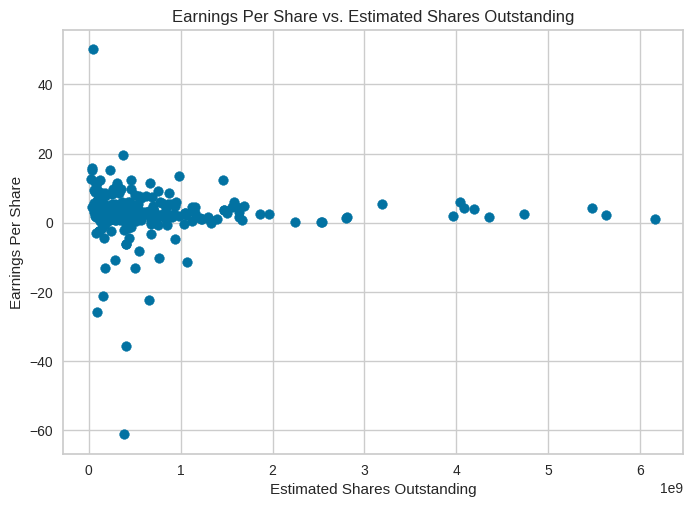

In [ ]:
plt.scatter(data['Estimated Shares Outstanding'], data['Earnings Per Share'])
plt.xlabel('Estimated Shares Outstanding')
plt.ylabel('Earnings Per Share')
plt.title('Earnings Per Share vs. Estimated Shares Outstanding')
plt.show()

<ipython-input-20-7437c17e0104>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-20-7437c17e0104>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


KeyError: 'Cash Ratio (1-100)'

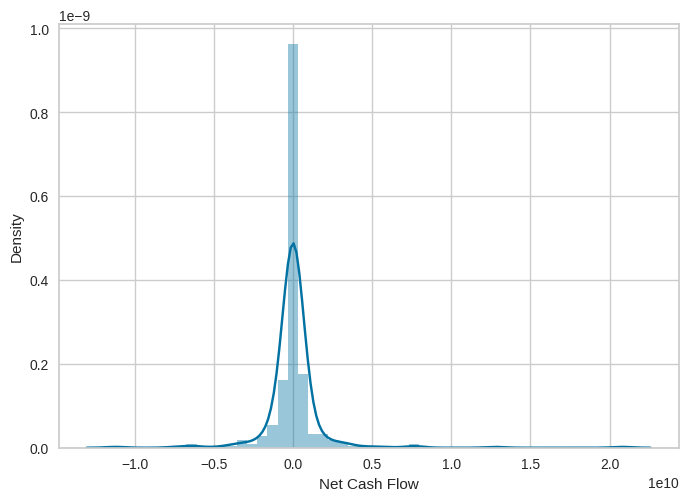

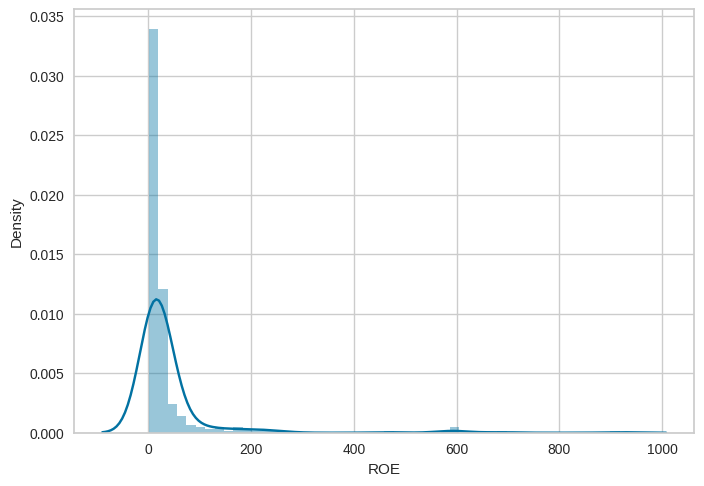

<Figure size 800x550 with 0 Axes>

In [ ]:
columns = ['Net Cash Flow', 'ROE','Cash Ratio (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i])

In [ ]:
col_names = ['Cash Ratio', 'Net Cash Flow', 'Net Income']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Cash Ratio,Net Cash Flow,Net Income
0,-0.210698,-0.339355,1.554415
1,0.077269,-0.002335,0.927628
2,-0.033488,0.454058,0.744371
3,1.218059,-0.152497,-0.219816
4,2.237018,0.133564,-0.202703


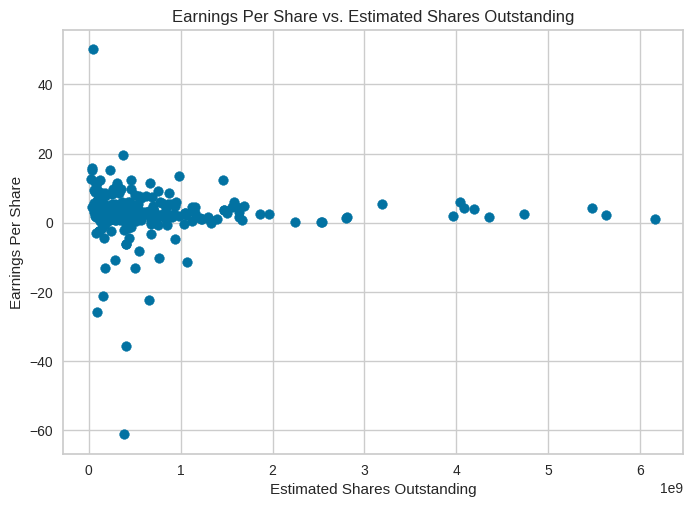

In [ ]:
plt.scatter(data['Estimated Shares Outstanding'], data['Earnings Per Share'])
plt.xlabel('Estimated Shares Outstanding')
plt.ylabel('Earnings Per Share')
plt.title('Earnings Per Share vs. Estimated Shares Outstanding')
plt.show()

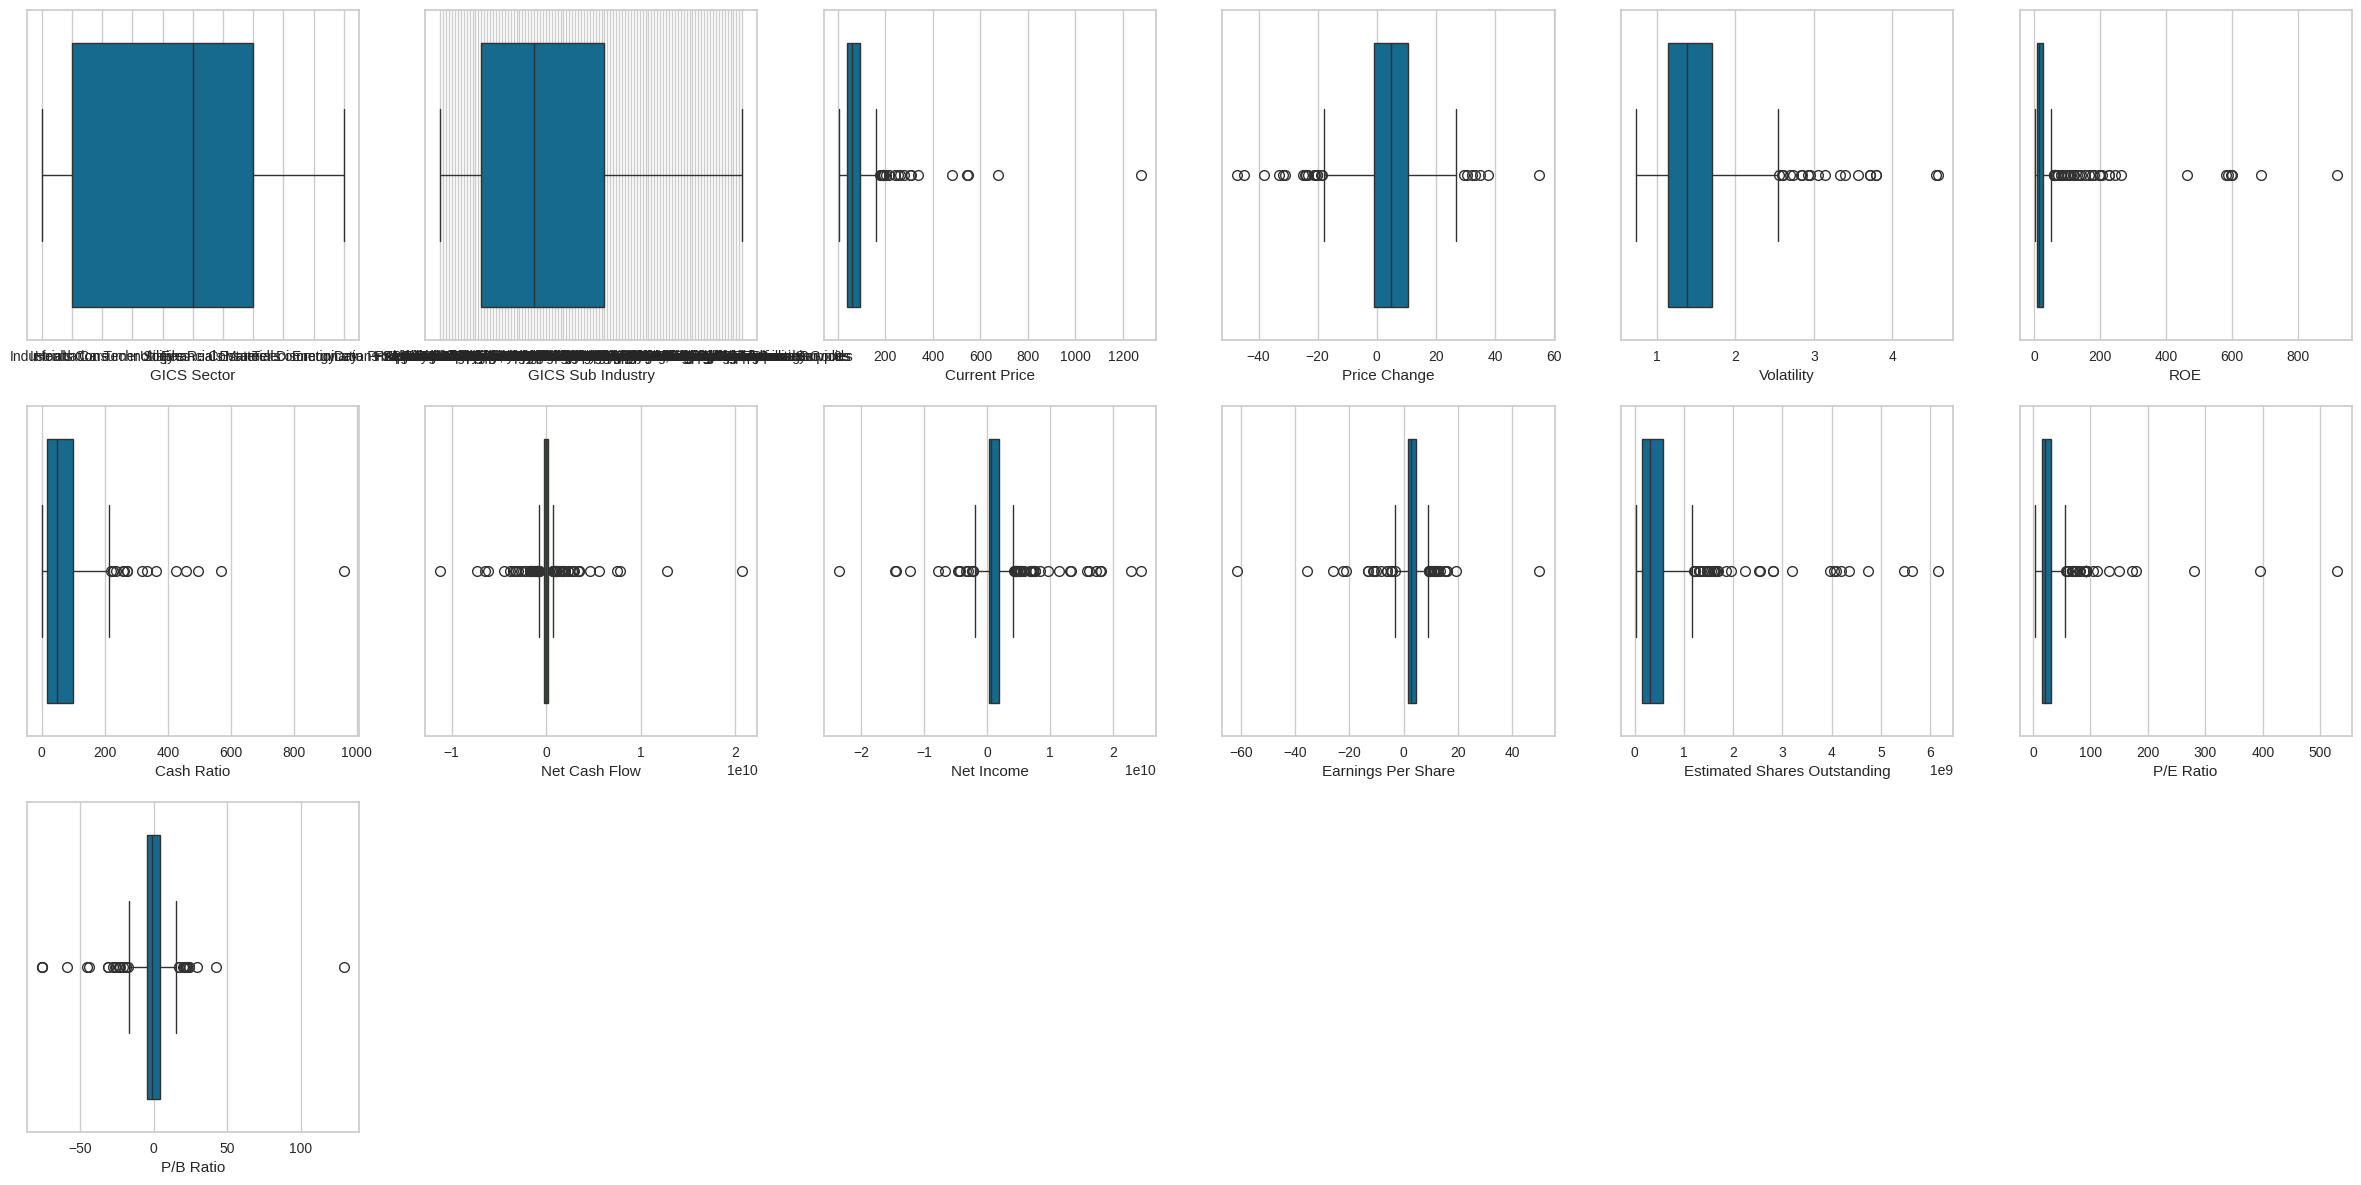

In [ ]:
cols=list(data.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=data,x=data[col])
dist_list(cols)

Bivariate Analysis

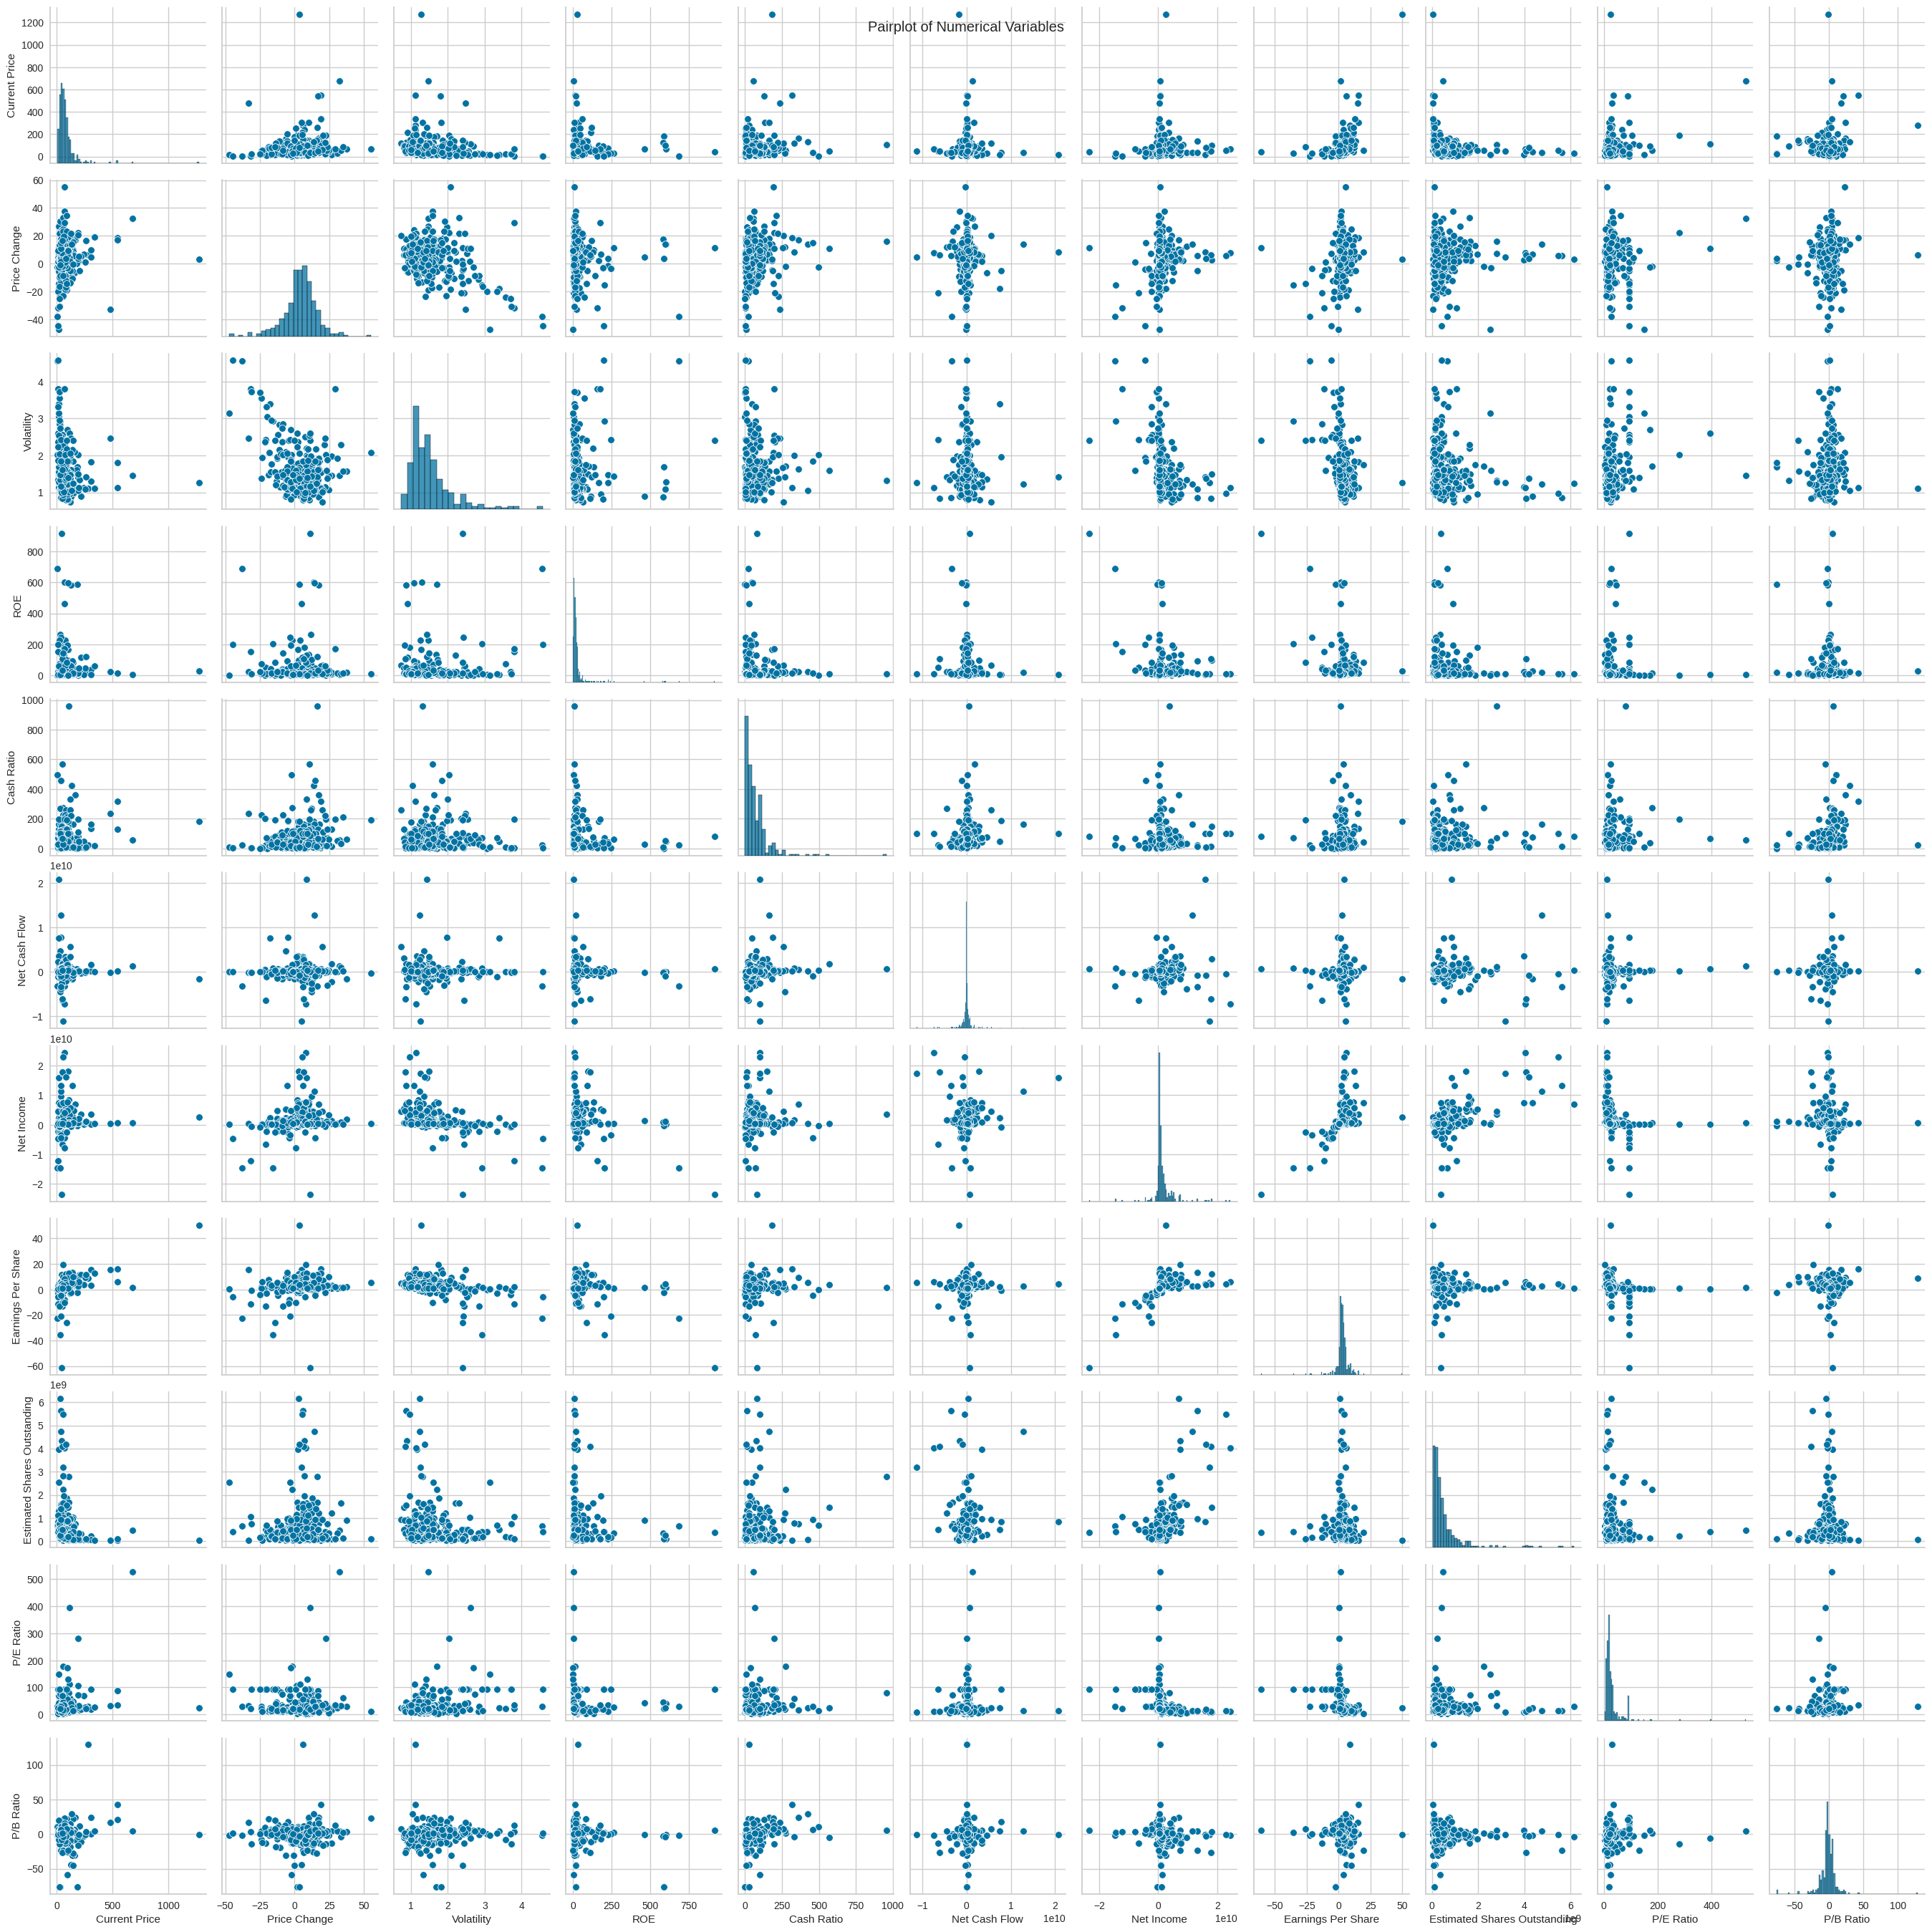

In [ ]:
sns.pairplot(data[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

<Axes: xlabel='Net Income', ylabel='GICS Sector'>

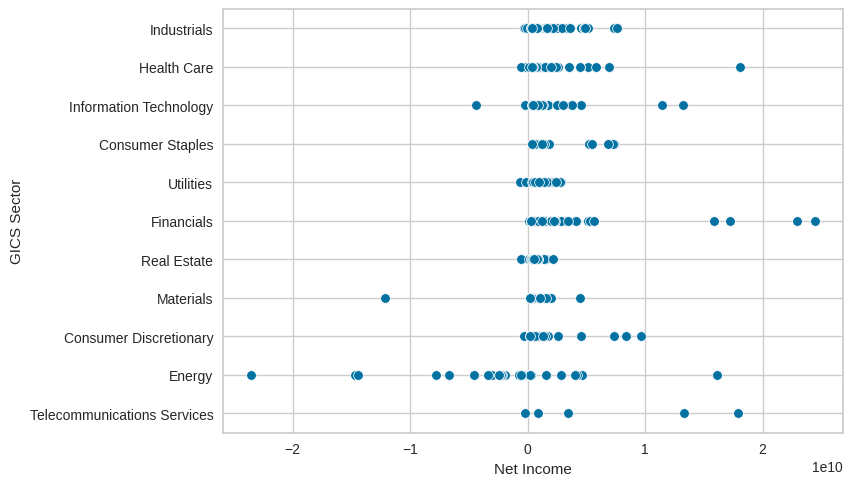

In [ ]:
sns.scatterplot(data, x='Net Income', y='GICS Sector')

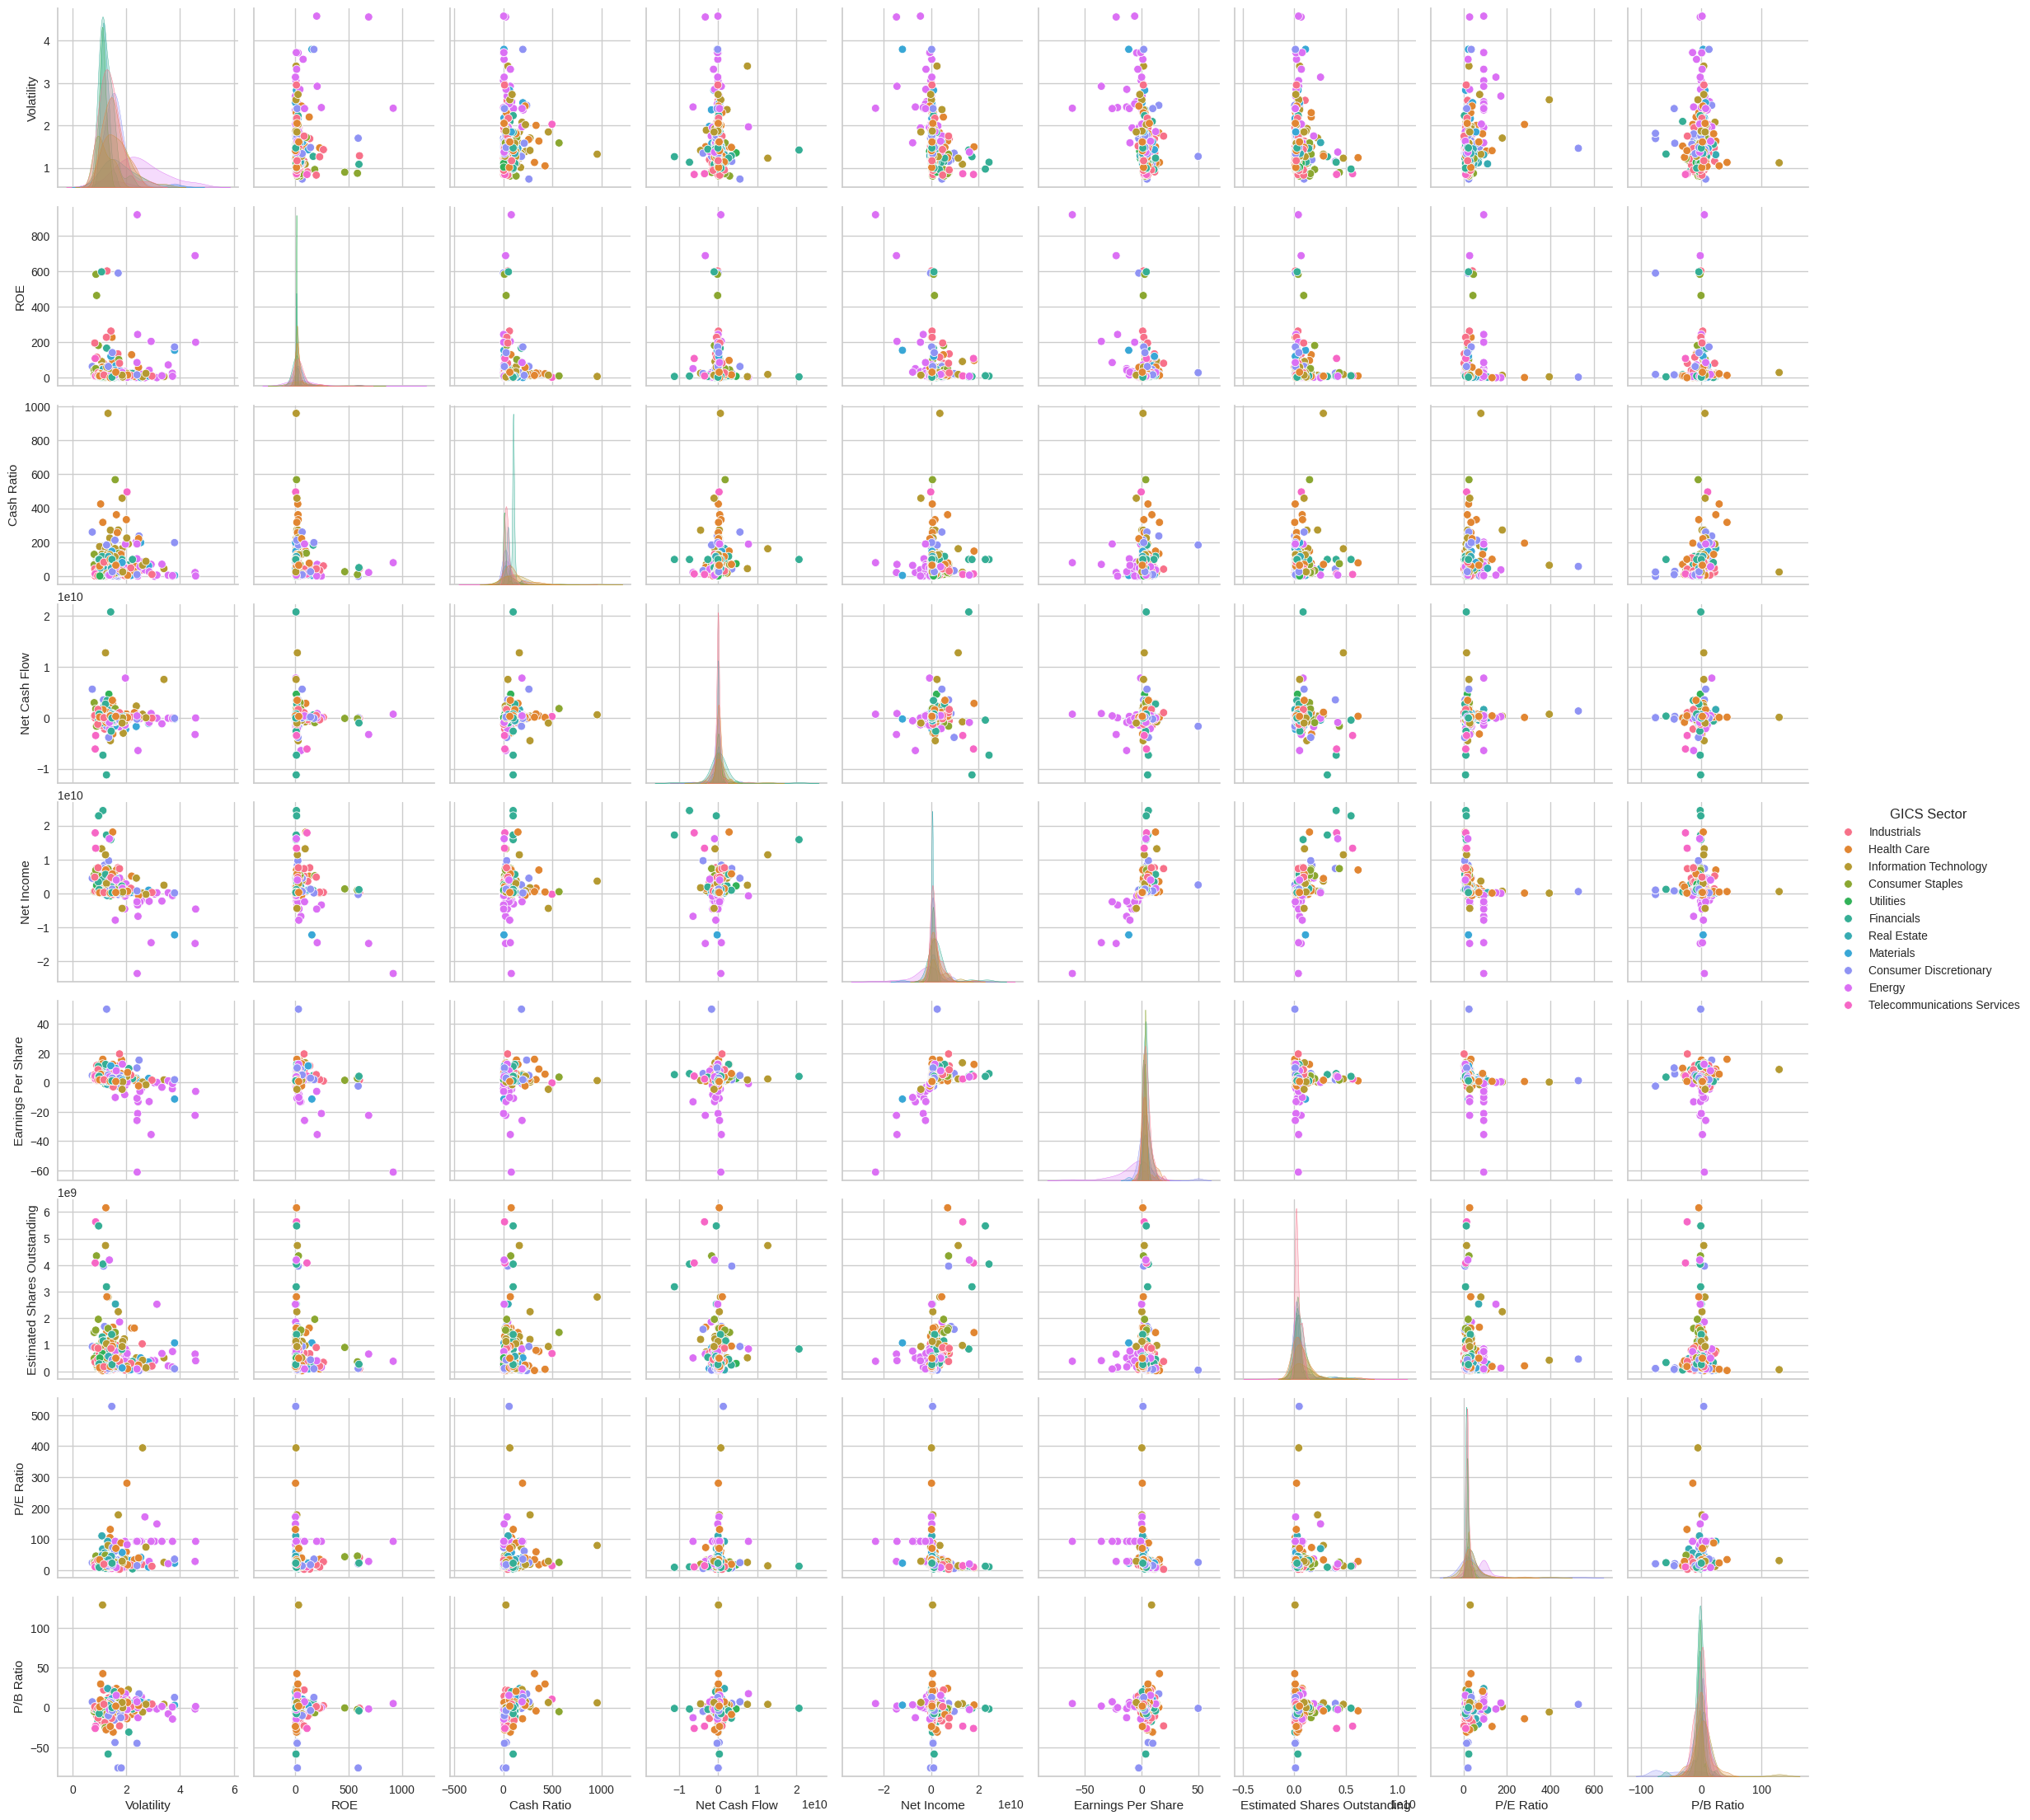

In [ ]:
data = data.drop(columns=['Current Price', 'Price Change'], axis=1)
sns.pairplot(data, hue='GICS Sector')

In [ ]:
data.groupby(['GICS Sector'])

In [ ]:
data.groupby(['GICS Sector'])[['Net Cash Flow', 'ROE']].mean()

,Net Cash Flow,ROE
GICS Sector,,
Consumer Discretionary,8.421318e+07,44.900000
Consumer Staples,2.586272e+08,89.421053
Energy,-3.083182e+08,93.200000
Financials,2.543563e+08,26.285714
Health Care,2.626878e+08,27.775000
Industrials,-1.601032e+08,50.150943
Information Technology,4.830991e+08,21.787879
Materials,-2.912368e+08,33.000000
Real Estate,3.546704e+06,12.444444


In [ ]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Volatility                    340 non-null    float64
 5   ROE                           340 non-null    int64  
 6   Cash Ratio                    340 non-null    int64  
 7   Net Cash Flow                 340 non-null    int64  
 8   Net Income                    340 non-null    int64  
 9   Earnings Per Share            340 non-null    float64
 10  Estimated Shares Outstanding  340 non-null    float64
 11  P/E Ratio                     340 non-null    float64
 12  P/B Ratio                     340 non-null    float64
dtypes: fl

In [ ]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.corr()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Ticker Symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volatility,NaN,NaN,NaN,NaN,1.000000,0.162532,0.020605,-0.014172,-0.383433,-0.379309,-0.095704,0.263600,0.046528
ROE,NaN,NaN,NaN,NaN,0.162532,1.000000,-0.069122,-0.052205,-0.288524,-0.405291,-0.030288,0.023341,-0.063218
Cash Ratio,NaN,NaN,NaN,NaN,0.020605,-0.069122,1.000000,0.113819,0.028589,0.024759,0.135869,0.089483,0.229672
Net Cash Flow,NaN,NaN,NaN,NaN,-0.014172,-0.052205,0.113819,1.000000,0.044229,0.019348,-0.051392,0.026876,0.057039
Net Income,NaN,NaN,NaN,NaN,-0.383433,-0.288524,0.028589,0.044229,1.000000,0.557752,0.589310,-0.224022,-0.061544
Earnings Per Share,NaN,NaN,NaN,NaN,-0.379309,-0.405291,0.024759,0.019348,0.557752,1.000000,-0.026906,-0.260660,0.014915


<Axes: >

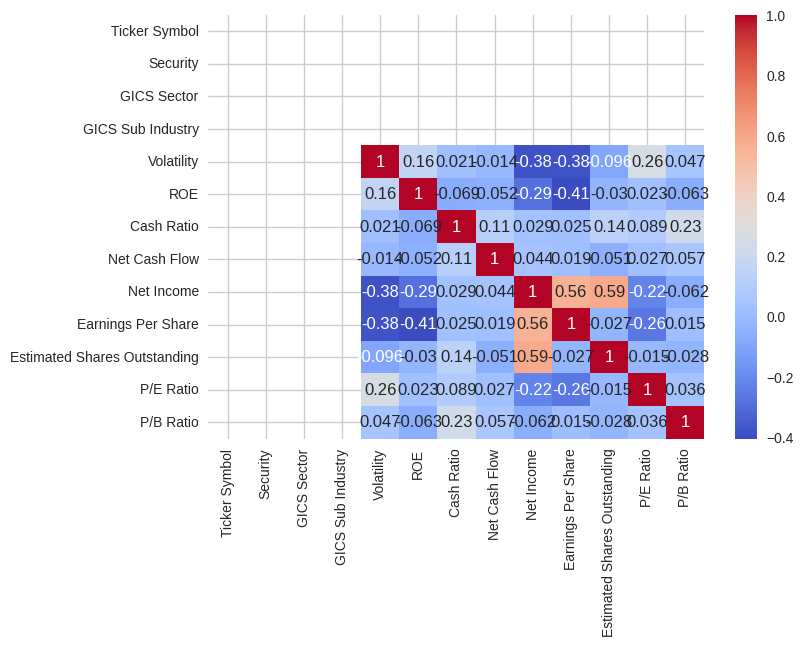

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

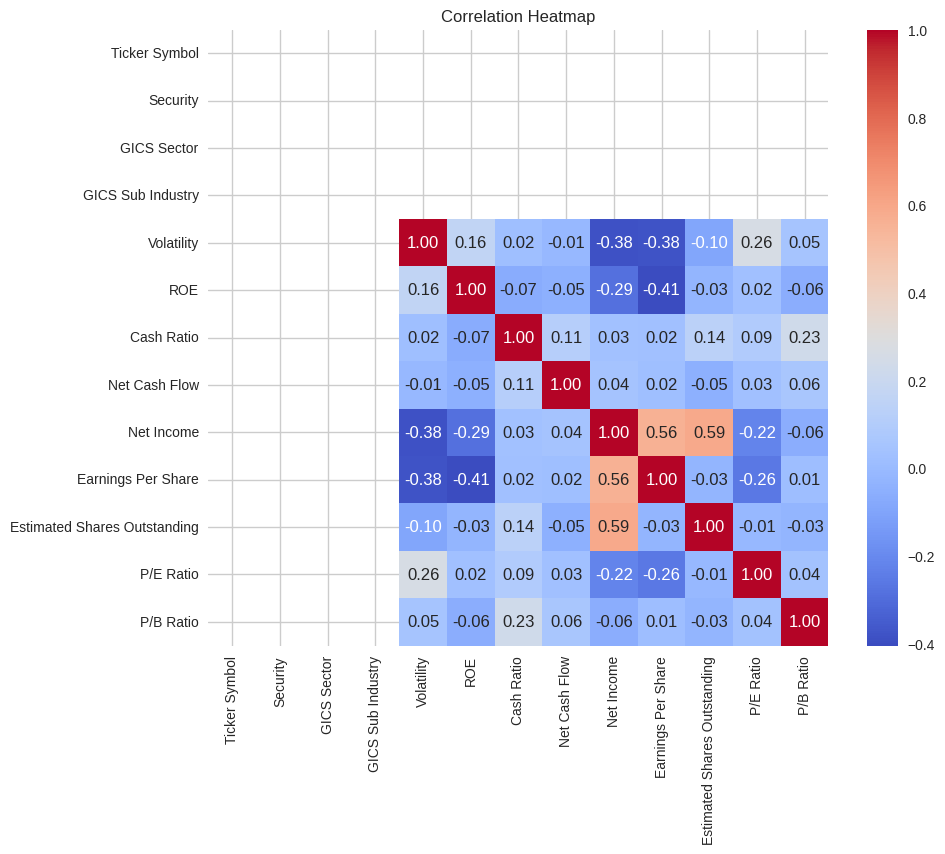

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Clustering

In [ ]:
clustering1 = KMeans()

In [ ]:
df = df.dropna()

In [ ]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


In [ ]:
if not df.empty:
    clustering1.fit(df[['Net Income']])
else:
    print("DataFrame is empty. Cannot fit the model.")

DataFrame is empty. Cannot fit the model.


In [ ]:
print(df.shape)


(0, 13)


In [ ]:
print(df.empty)

True


In [ ]:
if df.shape[0] > 0:
    clustering1.fit(df[['Net Income']])
else:
    print("Error: DataFrame is empty. Cannot perform clustering.")

Error: DataFrame is empty. Cannot perform clustering.


In [ ]:
clustering1.fit(data[['Cash Ratio']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
clustering1.labels_

array([0, 7, 7, 1, 6, 0, 0, 5, 5, 4, 4, 0, 4, 4, 1, 5, 7, 4, 0, 1, 4, 0,
       7, 6, 7, 0, 7, 5, 7, 4, 7, 5, 1, 0, 7, 0, 1, 5, 4, 5, 4, 4, 4, 7,
       7, 4, 4, 5, 0, 5, 0, 0, 4, 0, 4, 5, 0, 5, 6, 0, 4, 0, 5, 5, 5, 7,
       4, 0, 4, 4, 1, 0, 5, 7, 0, 4, 5, 5, 7, 5, 1, 0, 5, 0, 0, 5, 0, 7,
       5, 4, 5, 5, 0, 0, 0, 5, 0, 0, 0, 7, 5, 7, 7, 6, 5, 5, 5, 5, 5, 0,
       1, 0, 1, 5, 0, 4, 5, 0, 6, 7, 4, 0, 0, 0, 0, 2, 0, 5, 5, 0, 5, 7,
       7, 0, 5, 0, 1, 3, 5, 0, 4, 1, 0, 5, 4, 0, 5, 1, 4, 4, 5, 0, 0, 4,
       4, 0, 0, 0, 5, 0, 5, 0, 5, 7, 5, 0, 0, 1, 0, 5, 5, 6, 4, 7, 5, 5,
       4, 4, 0, 5, 5, 7, 5, 0, 0, 0, 5, 5, 7, 5, 5, 7, 0, 7, 0, 4, 0, 0,
       5, 7, 7, 6, 1, 5, 4, 5, 4, 5, 0, 4, 0, 3, 0, 7, 5, 7, 7, 4, 5, 0,
       0, 4, 7, 4, 5, 1, 7, 5, 5, 0, 0, 7, 4, 5, 0, 5, 5, 5, 7, 4, 0, 4,
       5, 1, 5, 7, 7, 4, 4, 4, 0, 5, 4, 5, 5, 0, 5, 4, 0, 5, 5, 0, 5, 5,
       4, 0, 4, 5, 5, 5, 4, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 4, 4, 1, 5, 4,
       4, 5, 0, 7, 5, 4, 5, 1, 4, 5, 5, 0, 4, 4, 0,

In [ ]:
clustering1.fit(data[['Net Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
clustering1.labels_

array([3, 3, 3, 0, 0, 6, 0, 0, 6, 6, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0,
       0, 3, 6, 0, 0, 0, 6, 6, 5, 7, 0, 0, 0, 0, 6, 0, 3, 3, 1, 0, 6, 0,
       7, 6, 6, 0, 6, 0, 0, 0, 1, 6, 6, 0, 6, 6, 6, 0, 0, 0, 2, 0, 0, 6,
       0, 6, 0, 0, 0, 6, 0, 0, 0, 3, 0, 0, 6, 0, 6, 0, 3, 3, 0, 6, 3, 6,
       6, 6, 0, 6, 3, 0, 0, 6, 0, 0, 0, 0, 6, 0, 2, 6, 0, 0, 0, 0, 0, 7,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 3, 0, 6, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 6, 1, 6, 3, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 7,
       6, 0, 3, 6, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0,
       0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 6, 6, 3, 6, 0, 0,
       0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 6, 3, 0, 3, 0, 6, 3, 7, 0, 0, 7,
       0, 0, 7, 0, 6, 0, 0, 7, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 6,
       0, 6, 6, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 6, 0, 3, 3, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 6, 6, 6, 0, 7, 6,
       6, 1, 0, 0, 0, 0, 6, 0, 6, 0, 0, 6, 0, 6, 0,

In [ ]:
df['Net Income Cluster'] = clustering1.labels_
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Net Income Cluster,Cash ratio Cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
df['Cash ratio'] = clustering1.labels_
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Net Income Cluster,Cash ratio Cluster,Cash ratio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
clustering1.inertia_

2.1882753234747687e+20

In [ ]:
intertia_scores=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['Net Income']])
    intertia_scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
intertia_scores

[5.262901851830238e+21,
 2.7420111044341955e+21,
 1.5061380838248258e+21,
 7.393746684968832e+20,
 5.128159427314735e+20,
 3.959789603501757e+20,
 2.9030148838665493e+20,
 2.1881436163665494e+20,
 1.4786415108849113e+20,
 1.1615348476901061e+20]

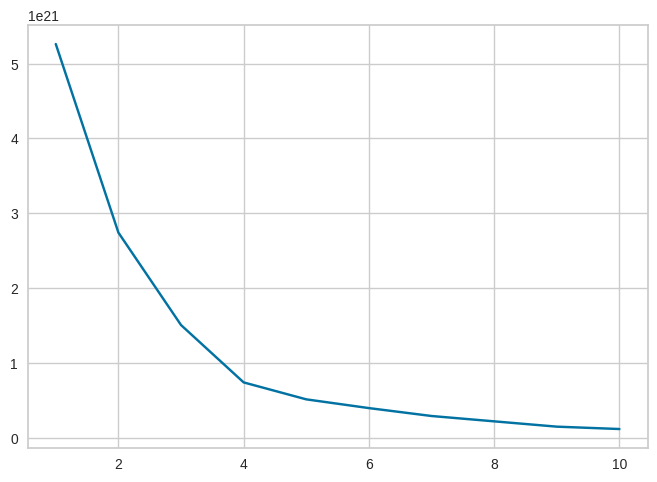

In [ ]:
plt.plot(range(1, 11),intertia_scores)

In [ ]:
data.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
       'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
       'P/B Ratio'],
      dtype='object')

In [ ]:
data['Ticker Symbol'] = data['Ticker Symbol'].astype(str)

In [ ]:
data = data.dropna(subset=['Ticker Symbol'])

In [ ]:
if 'Net Income Cluster' in data.columns:
    data.groupby('Net Income Cluster')['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
           'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
           'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
           'P/B Ratio'].mean()
else:
    print("Column 'Net Income Cluster' not found in DataFrame.")

Column 'Net Income Cluster' not found in DataFrame.


In [ ]:
try:
    data.groupby('Net Income Cluster')['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
           'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
           'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
           'P/B Ratio'].mean()
except KeyError:
    print("Column 'Net Income Cluster' not found in DataFrame.")

Column 'Net Income Cluster' not found in DataFrame.


In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['Cash Ratio', 'Net Income']])
df['Cash Ratio and Net Income'] = clustering2.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Net Income Cluster,Cash ratio Cluster,Cash ratio,Cash Ratio and Net Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

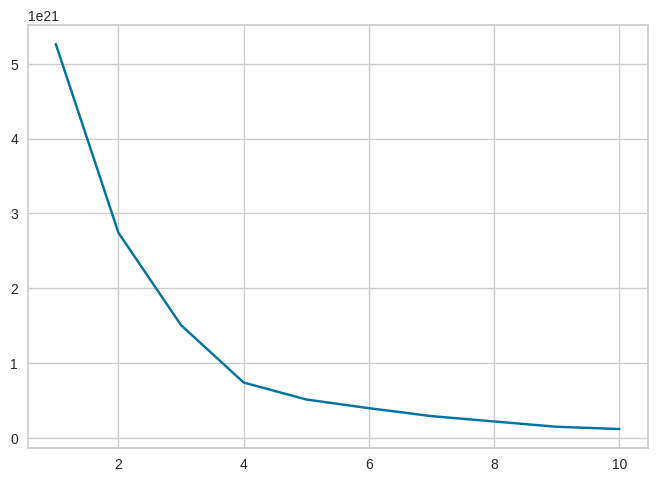

In [ ]:
intertia_scores2=[]
for i in range(1, 11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data[['Net Income']])
    intertia_scores2.append(-1 * kmeans2.score(data[['Net Income']]))
plt.plot(range(1,11),intertia_scores2)

In [ ]:
clustering2.cluster_centers_

array([[ 6.60000000e+01,  8.16658461e+08],
       [ 9.15000000e+01,  5.41208409e+09],
       [ 9.32500000e+01, -3.80586483e+09],
       [ 4.42500000e+01, -1.62057500e+10],
       [ 6.66666667e+01,  1.76820000e+10]])

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x','y']

ValueError: Could not interpret value `<valid_column_name>` for `hue`. An entry with this name does not appear in `data`.

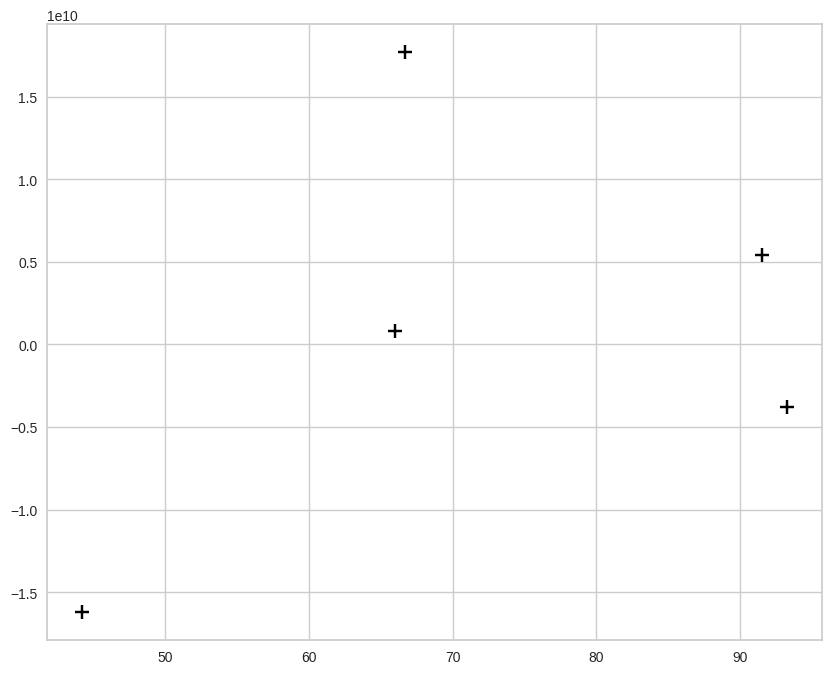

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x= centers['x'],y=centers['y'],s=100,c='black',marker='+')
sns.scatterplot(data=df, x='Net Income', y='GICS Sector', hue='<valid_column_name>', palette='tab10')

In [ ]:
pd.crosstab(df['Cash Ratio and Net Income'],df['GICS Sector'],normalize='index')

GICS Sector
Cash Ratio and Net Income


In [ ]:
scale = StandardScaler()

In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Net Income Cluster,Cash ratio Cluster,Cash ratio,Cash Ratio and Net Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [ ]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
dff=pd.get_dummies(data)
dff.head()

,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Ticker Symbol_AAL,...,GICS Sub Industry_Specialty Retail,GICS Sub Industry_Specialty Stores,GICS Sub Industry_Steel,"GICS Sub Industry_Technology Hardware, Storage & Peripherals","GICS Sub Industry_Technology, Hardware, Software and Supplies",GICS Sub Industry_Thrifts & Mortgage Finance,GICS Sub Industry_Tires & Rubber,GICS Sub Industry_Tobacco,GICS Sub Industry_Trucking,GICS Sub Industry_Water Utilities
0,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,True,...,False,False,False,False,False,False,False,False,False,False
1,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,False,...,False,False,False,False,False,False,False,False,False,False
2,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,False,...,False,False,False,False,False,False,False,False,False,False
3,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,False,...,False,False,False,False,False,False,False,False,False,False
4,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dff=pd.get_dummies(data,drop_first=True)
dff.head()

,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Ticker Symbol_ABBV,...,GICS Sub Industry_Specialty Retail,GICS Sub Industry_Specialty Stores,GICS Sub Industry_Steel,"GICS Sub Industry_Technology Hardware, Storage & Peripherals","GICS Sub Industry_Technology, Hardware, Software and Supplies",GICS Sub Industry_Thrifts & Mortgage Finance,GICS Sub Industry_Tires & Rubber,GICS Sub Industry_Tobacco,GICS Sub Industry_Trucking,GICS Sub Industry_Water Utilities
0,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,False,...,False,False,False,False,False,False,False,False,False,False
1,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,True,...,False,False,False,False,False,False,False,False,False,False
2,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,False,...,False,False,False,False,False,False,False,False,False,False
3,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,False,...,False,False,False,False,False,False,False,False,False,False
4,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dff

,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Ticker Symbol_ABBV,...,GICS Sub Industry_Specialty Retail,GICS Sub Industry_Specialty Stores,GICS Sub Industry_Steel,"GICS Sub Industry_Technology Hardware, Storage & Peripherals","GICS Sub Industry_Technology, Hardware, Software and Supplies",GICS Sub Industry_Thrifts & Mortgage Finance,GICS Sub Industry_Tires & Rubber,GICS Sub Industry_Tobacco,GICS Sub Industry_Trucking,GICS Sub Industry_Water Utilities
0,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,False,...,False,False,False,False,False,False,False,False,False,False
1,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,True,...,False,False,False,False,False,False,False,False,False,False
2,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,False,...,False,False,False,False,False,False,False,False,False,False
3,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,False,...,False,False,False,False,False,False,False,False,False,False
4,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775,False,...,False,False,False,False,False,False,False,False,False,False
336,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260,False,...,False,False,False,False,False,False,False,False,False,False
337,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449,False,...,False,False,False,False,False,False,False,False,False,False
338,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dff.columns

Index(['Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
       'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
       'P/B Ratio', 'Ticker Symbol_ABBV',
       ...
       'GICS Sub Industry_Specialty Retail',
       'GICS Sub Industry_Specialty Stores', 'GICS Sub Industry_Steel',
       'GICS Sub Industry_Technology Hardware, Storage & Peripherals',
       'GICS Sub Industry_Technology, Hardware, Software and Supplies',
       'GICS Sub Industry_Thrifts & Mortgage Finance',
       'GICS Sub Industry_Tires & Rubber', 'GICS Sub Industry_Tobacco',
       'GICS Sub Industry_Trucking', 'GICS Sub Industry_Water Utilities'],
      dtype='object', length=800)

In [ ]:
dff=dff[['Cash Ratio', 'Net Cash Flow', 'Net Income']]
dff.head()

,Cash Ratio,Net Cash Flow,Net Income
0,51,-604000000,7610000000
1,77,51000000,5144000000
2,67,938000000,4423000000
3,180,-240840000,629551000
4,272,315120000,696878000


In [ ]:
dff=scale.fit_transform(dff)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

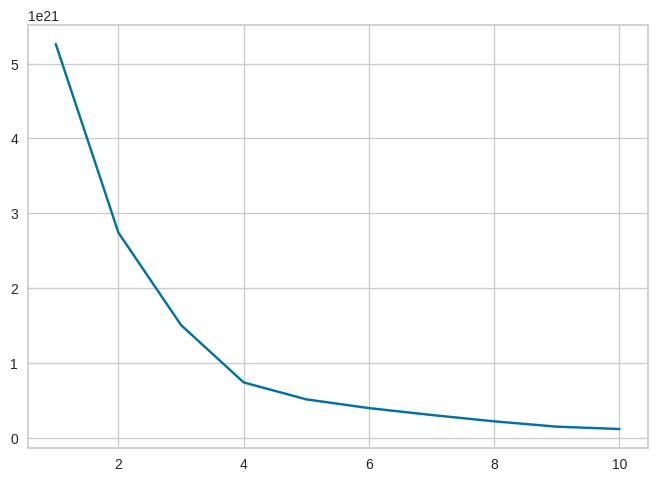

In [ ]:
intertia_scores3=[]
for i in range(1, 11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(data[['Net Income']])
    intertia_scores3.append(-1 * kmeans3.score(data[['Net Income']]))
plt.plot(range(1,11),intertia_scores3)

In [ ]:
features = enc.fit_transform(features).toarray()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
features = enc.fit_transform(features).toarray()

scale = MinMaxScaler()
features = scale.fit_transform(features)

In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = Kmeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

        fig = plt.subplots(figsize =(10, 5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inerta')
        plt.grid(True)
        plt.show()

In [ ]:
data = data.dropna(axis=0, how='any')

In [ ]:
print(data.columns)

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
       'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
       'P/B Ratio'],
      dtype='object')


In [ ]:
print(data.head())


  Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0               Airlines    1.687151  135          51     -604000000   
1        Pharmaceuticals    2.197887  130          77       51000000   
2  Health Care Equipment    1.273646   21          67      938000000   
3   Application Software    1.357679    9         180     -240840000   
4         Semiconductors    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   


In [ ]:
data['Ticker Symbol'] = pd.to_numeric(data['Ticker Symbol'], errors='coerce')

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.3 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer()

In [ ]:
imputer.fit(df)

SimpleImputer()

In [ ]:
df = imputer.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

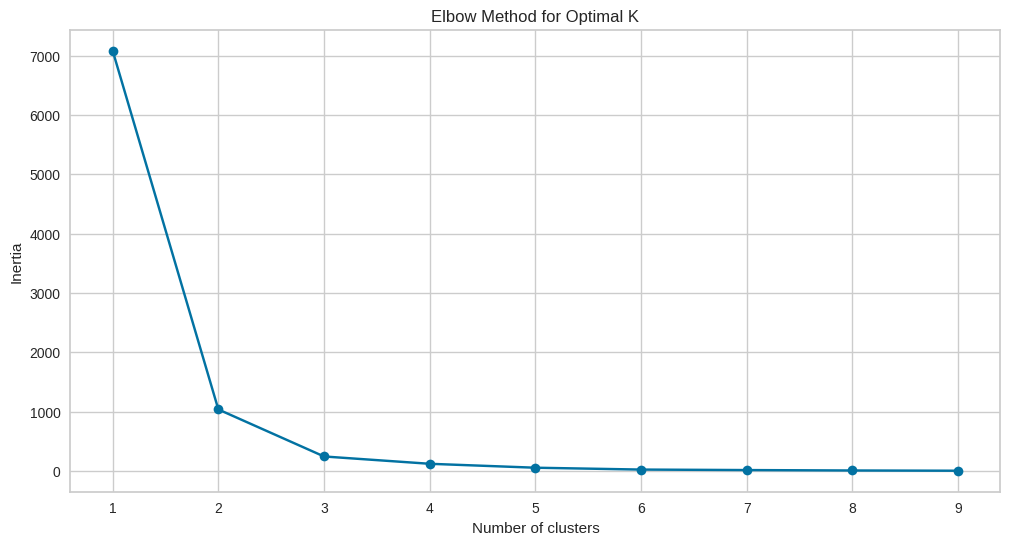

In [ ]:
SSE = []

for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster': range(1, 10), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
if notebook_name.endswith('.ipynb'):
    html_name = notebook_name[:-6] + '.html'  # Remove '.ipynb' extension
else:
    html_name = notebook_name + '.html'

# Remove the '.py' extension from the html_name variable
html_name = html_name[:-3]

In [ ]:
html_name = html_name + '.html'

In [ ]:
data.to_html('clustering.html')

In [ ]:
!jupyter nbconvert -- to html Trade & Ahead Segmention.ipynb

/bin/bash: line 1: Ahead: command not found
[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] WARNING | pattern 'Trade' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterAp